<h1>ロジスティック回帰 Logistic Regression</h1>

<h2>Why not use linear regression to classification</h2>

<img src="https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/f86eacc2a74159c068e82ea267a752f7.png">

改善するため

<img src="https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/e7f9a746894c4c7dfd10cfcd9c84b5f9.png">


Hypothesis Representation

<img src="https://github.com/fengdu78/Coursera-ML-AndrewNg-Notes/raw/master/images/6590923ac94130a979a8ca1d911b68a3.png">


<h2>How to understand hθ(x) </h2>


hθ(x) = 0.7 の場合、70%の確率で悪性(1)、30%の確率で良性(0)になる。


これを式で表すと以下の通り　（P(y=1|x;θ)はx,θをパラメータとしてy=1である確率の意味）
<img src="https://camo.qiitausercontent.com/78b62913e9bea181302517f119eb93fe4c18391e/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f61616637616432332d336662612d633262622d653733372d3661653164643635356162392e706e67">

<hr/>
<h1>コスト関数 (cost function)</h1>

<img src="https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/f23eebddd70122ef05baa682f4d6bd0f.png">

回帰分析 (Liner Regression)の場合、

$\large h_\theta(x) = \theta^T x$

$\large J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2$

ロジスティック回帰 (Logistic Regression)の場合、

$\large h_\theta (x)  = \frac{1}{1 + e^{-\theta^{\mathrm{T}} x}}$

$\large J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)})$

$\text{if y = 1}$
　　　⇒　$\large {Cost}(h_\theta(x),y) = -\log(h_\theta(x))$ 
   
$\text{if y = 0}$
　　　⇒　$\large {Cost}(h_\theta(x),y) = -\log(1-h_\theta(x))$ 
   
   
   
   
   
<h2>どうやって理解するの</h2>


y=1 の時　・・ hθ(x)＝1の時、J(θ）は1に漸近

<img width=400  src="https://camo.qiitausercontent.com/5e38135c9a8a664350eccf7fd057f0d94228fc80/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f31306338343036662d323966632d623935632d616463362d3731326462343266626262372e706e67">


y=0 の時　・・ hθ(x)＝1の時、J(θ）は1に漸近

<img width=400 src="https://camo.qiitausercontent.com/392dd314f0d4e1a8355ed6210d68d3788b027c24/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f31353832376130642d333833392d316463382d346465352d3035373666313038646135352e706e67">


\begin{align*}& \mathrm{Cost}(h_\theta(x),y) = 0 \text{ if } h_\theta(x) = y \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 0 \; \mathrm{and} \; h_\theta(x) \rightarrow 1 \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 1 \; \mathrm{and} \; h_\theta(x) \rightarrow 0 \newline \end{align*}

<h2>Simplified Cost Function</h2>


上記をy=1,0に分けずに式にすると


$\large \mathrm{Cost}(h_\theta(x),y) = - y \; \log(h_\theta(x)) - (1 - y) \log(1 - h_\theta(x))$




この式は以下のように表せる。



$\large J(\theta) = - \frac{1}{m} [ \sum_{i=1}^m y^{(i)} log(h_\theta (x^{(i)})) + (1 - y^{(i)}) log(1 - h_\theta (x^{(i)}))]$


ベクトル化すると以下

$\large h = g(X\theta)$

$\large J(\theta) = \frac{1}{m} \cdot \left(-y^{T}\log(h)-(1-y)^{T}\log(1-h)\right) $







<hr/>
<h1>最急降下法 (Gradient Descent)</h1>


<img src="https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/171031235527.png">


Liner Regression)の場合、
${h_\theta}\left( x \right)={\theta^T}X={\theta_{0}}{x_{0}}+{\theta_{1}}{x_{1}}+{\theta_{2}}{x_{2}}+...+{\theta_{n}}{x_{n}}$

Logistic Regression)の場合、
${h_\theta}\left( x \right)=\frac{1}{1+{{e}^{-{\theta^T}X}}}$



・・・つまり、単回帰分析や重回帰分析となにも変わりません。

ロジスティック回帰の場合は、$h_\theta (x)$がロジスティック（シグモイド）関数である点が唯一の違いです。


In [8]:
import numpy as np
import matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import Series,DataFrame

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
print(np.version.full_version)
print(matplotlib.__version__)
print(pd.__version__)

1.15.4
2.1.1
0.23.4


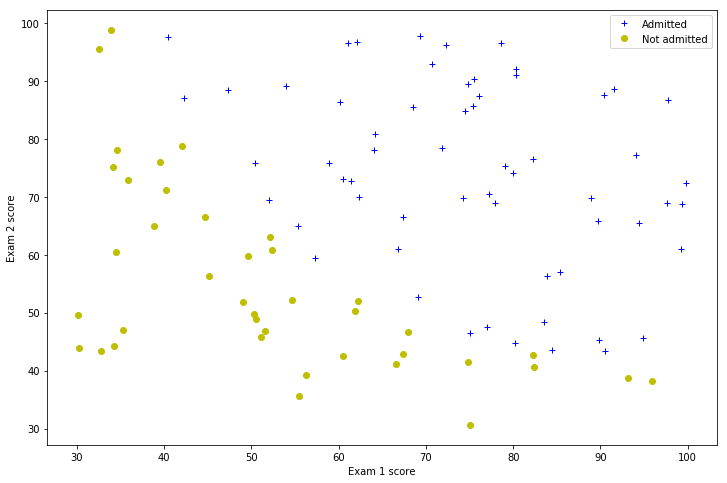

In [9]:
data = pd.read_csv("./03_Logistic Regression_data_01.txt", header=None)
# read 1st, 2nd column as feature matrix (100x2)
X_data = np.array([data[0],data[1]]).T
# read 3rd column as label vector (100)
y = np.array(data[2])


# データをプロットする
plt.plot(X_data[y==1, 0], X_data[y==1, 1], "b+", label="Admitted")
plt.plot(X_data[y==0, 0], X_data[y==0, 1], "yo", label="Not admitted")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

$\large h_\theta (x)  = \frac{1}{1 + e^{-\theta^{\mathrm{T}} x}}$

⇒h_theta = 1 / (1 + np.exp(np.dot(-X, theta)))

$\large J(\theta) = - \frac{1}{m} [ \sum_{i=1}^m y^{(i)} log(h_\theta (x^{(i)})) + (1 - y^{(i)}) log(1 - h_\theta (x^{(i)}))]$

⇒J = np.sum(-y * np.log(h_theta) - (1 - y) * np.log(1 - h_theta)) / len(y)

In [30]:
# コスト関数
def cost_function(theta, X, y):
    h_theta = 1 / (1 + np.exp(np.dot(-X, theta)))
    J = np.sum(-y * np.log(h_theta) - (1 - y) * np.log(1 - h_theta)) / len(y)
    grad = np.zeros(len(theta))
    for j in range(len(theta)):
        grad[j] = sum((h_theta - y) * X[:, j]) / len(y)
    return J, grad

Decision Boundary（決定境界）を描画する。ロジスティック回帰の決定境界は $\theta^{T} X = 0$で定義される直線。例題の場合、成分で書き下すと、$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$、これを解いて $x_2 = - \frac{\theta_0 + \theta_1 x_1}{\theta_2}$の式で決定境界上の点の座標を計算し、plot関数に渡す。


以下の例：

plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

plot_y = (-1 / test_theta[2]) * (test_theta[1] * plot_x + test_theta[0])


Cost at test theta:
0.2655270173717252
Gradient at test theta:
[-0.03746825 -1.13106934 -3.80913918]


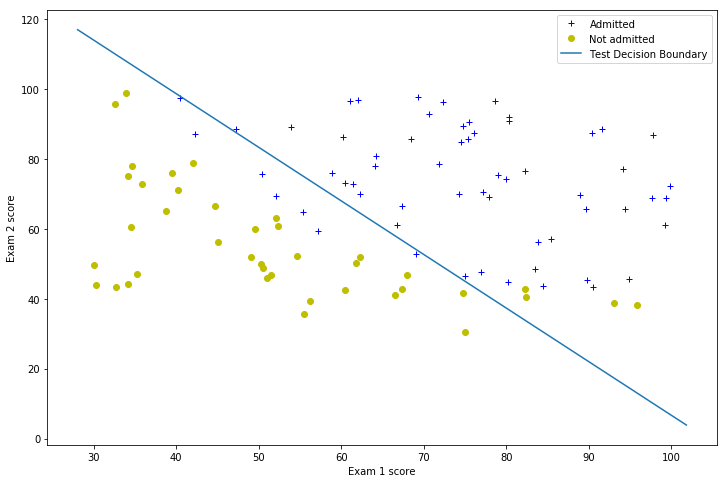

In [48]:
# コストと勾配のテスト
X = np.c_[np.ones(len(y)), X_data]
test_theta = np.array([-24, 0.23, 0.15])
cost, grad = cost_function(test_theta, X, y)
print("Cost at test theta:")
print(cost)
print("Gradient at test theta:")
print(grad)


# 決定境界のプロット
plt.plot(X_data[y==1, 0], X_data[y==1, 1], "b+", label="Admitted")
plt.plot(X_data[y==0, 0], X_data[y==0, 1], "yo", label="Not admitted")
plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
plot_y = (-1 / test_theta[2]) * (test_theta[1] * plot_x + test_theta[0])
plt.plot(plot_x, plot_y, label="Test Decision Boundary")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()


<b>組み込みのsklearn.linear_model.LogisticRegressionを使う（おすすめ）</b>

In [41]:
from sklearn.linear_model import LogisticRegression

#この例題では正則化なしにしたいため、Cには大きな値（1,000,000)を入れた。
regr = LogisticRegression(max_iter=400, C=1e10)

regr.fit(X_data, y)
print("Intercept : ", regr.intercept_)
print("Coef : {0} {1} ".format(regr.coef_[0][0], regr.coef_[0][1]))


Intercept :  [-24.9560464]
Coef : 0.20459007882537472 0.19981008677410717 


In [33]:
# 具体的な値で予測
# predict_probaで確率の推定になる、predictは0か1の推定
prob = regr.predict_proba(np.array([45, 85]).reshape(1, -1)) 
print("For a student with scores 45 and 85, we predict an admission probability of ")
#1つ目の値はy=0である確率（要は不合格の確率）
print("[Not admitted, Admitted] = ", prob) 
# 精度
print("Train Accuracy:")
print(regr.score(X_data, y)*100)

For a student with scores 45 and 85, we predict an admission probability of 
[Not admitted, Admitted] =  [[0.22541844 0.77458156]]
Train Accuracy:
89.0


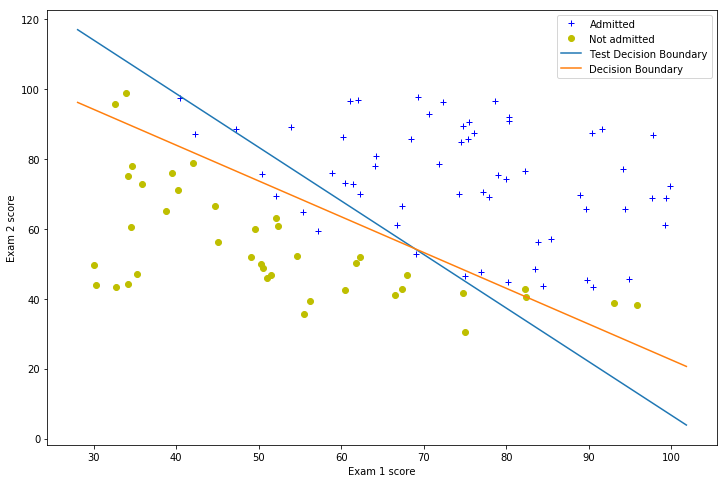

In [46]:
# 決定境界のプロット
plt.plot(X_data[y==1, 0], X_data[y==1, 1], "b+", label="Admitted")
plt.plot(X_data[y==0, 0], X_data[y==0, 1], "yo", label="Not admitted")
plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
plot_test_y = (-1 / test_theta[2]) * (test_theta[1] * plot_x + test_theta[0])
plt.plot(plot_x, plot_test_y, label="Test Decision Boundary")

plot_y = (-1 / regr.coef_[0][1]) * (regr.coef_[0][0] * plot_x + regr.intercept_)
plt.plot(plot_x, plot_y, label="Decision Boundary")


plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

<h1>Multiclass Classification_ One-vs-all </h1>


One Vs ALL  ⇒ One Vs Rest


<img width=500 src="https://camo.qiitausercontent.com/d6b864850eac576c81235a55e8c28a14460cbc1e/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f34373430666566322d633663352d343435312d323366622d3331613862393862316263332e706e67">


それぞれのモデルは、

$h_\theta ^{(i)} (x) = P (y = i | x; \theta)$


　というように、θθによってパラメーターづけられたインプットxxに対して、y=iy=iとなる条件付き確率を返します。新たなインプット$x_{new}$が与えられたとき、それが属するカテゴリーは、$h_\theta ^{(i)} (x_{new})$が最大となるカテゴリーiiとなります。


<h1>正則化 (Regularization)</h1>

<h2>アンダーフィッティング (Underfitting) & オーバーフィッティング (Overfitting)</h2>

<img src="https://camo.qiitausercontent.com/4b19a5743b3e98e6d0e67884c0235c1a84fb8264/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f35393162623932382d653362622d616264632d663434352d6535356161643631623034322e706e67">

①　$h_\theta (x) = \theta_0 + \theta_1 x$　  ⇒　精度が悪すぎ、予測できないかも

②　$h_\theta (x) = \theta_0 + \theta_1 x + \theta_2 x^2$

③　$h_\theta (x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 + ...$   ⇒　精度が100%近いが、全く役に立たないかも


<hr/>

<img src="https://camo.qiitausercontent.com/73d3fb32fc5cd9c2ede096a4b9cae81c844d970a/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3132323335342f33383735343338342d353462642d663261372d623537322d3865373831386366363132322e706e67">

①　$h_\theta (x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$　  ⇒　精度が悪すぎ、予測できないかも

②　$h_\theta (x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 + ...)$

③　$h_\theta (x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \theta_3 x_1^2 x_2 + \theta_4 x_1^2 x_2^2 + \theta_5 x_1^2 x_2^3 + \theta_6 x_1^3 x_2 + ...)$   ⇒　精度が100%近いが、全く役に立たないかも


<h2>正則化 (Regularization):余計な説明変数を減らしたり、必要な説明変数を増やしたりする</h2>

パラメーター$\theta$の値を十分小さくしてしまえば、説明変数$x$がどんな多項式であっても、その説明変数の予測値$h_\theta(x)$への影響を小さくできるからオーバーフィットしにくくなる、という考えです。


そのために、正則化パラメーター (Regularization Parameter) $\lambda$を目的関数$J(\theta)$に導入します。


線形回帰の場合、

$\large J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2  +   \frac{\lambda}{2m}  \sum_{j=1}^n \theta_j^2 $

ロジスティック回帰の場合、

$\large J(\theta) = - \frac{1}{m} [ \sum_{i=1}^m y^{(i)} log(h_\theta (x^{(i)})) + (1 - y^{(i)}) log(1 - h_\theta (x^{(i)}))] +   \frac{\lambda}{2m}  \sum_{j=1}^n \theta_j^2$


<hr/>

${h_\theta}\left( x \right)={\theta_{0}}+{\theta_{1}}{x_{1}}+{\theta_{2}}{x_{2}^2}+{\theta_{3}}{x_{3}^3}+{\theta_{4}}{x_{4}^4}$ 

理想の正則化 (Regularization)

$\underset{\theta }{\mathop{\min }},\frac{1}{2m}[\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}+1000\theta _{3}^{2}+10000\theta _{4}^{2}]}$

実際は：

$J\left( \theta \right)=\frac{1}{2m}[\sum\limits_{i=1}^{m}{{{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})}^{2}}+\lambda \sum\limits_{j=1}^{n}{\theta_{j}^{2}}]}$

<img src="https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/ea76cc5394cf298f2414f230bcded0bd.jpg">


$\lambda$を大きくしすぎると ($\lambda = 10^6$など)、$\theta_0$以外の全ての$\theta$ (\theta_1,theta_2,theta_3,...,theta_n )が、限りなく$0$に近づきます。すると、$h_\theta (x) \to \theta_0$となり、アンダーフィットになってしまいます。

<img src="https://camo.qiitausercontent.com/3a925e4f56ee268305b74840dedccfd49d25d64a/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3132323335342f66616262636431632d626662352d393532312d323265392d3961343136646462383436642e706e67">


<hr/>
正則化 (Regularization)後のGradient Descentが以下

<img width=800  src="https://camo.qiitausercontent.com/955d5217cadcb88eb86720b8ec244020c483f0d9/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f66353935376164362d633336642d353861612d356533632d3861626365303036633465352e706e67">

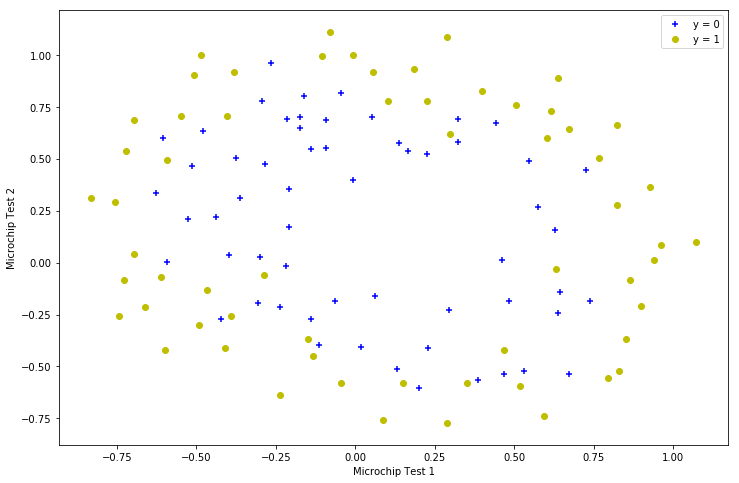

In [66]:
data = pd.read_csv("./03_Logistic Regression_data_02.txt", header=None)

x1 = np.array(data[0])
x2 = np.array(data[1])
y = np.array(data[2])

pos = (y==1) # numpy bool index
neg = (y==0) # numpy bool index
plt.scatter(x1[pos], x2[pos], marker='+', c='b') # 正例は'+'
plt.scatter(x1[neg], x2[neg], marker='o', c='y') # 負例は'o'
plt.legend(['y = 0', 'y = 1'], scatterpoints=1)
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")

plt.show()

In [82]:
# mapFeature(x1, x2)
# feature mapping（特徴量マッピング）をする
# 引数：特徴量ベクトル x1, x2 （同じ次元nでなければならない）
# 返り値：特徴量行列 X (nx28行列)
# 6次までの場合 1, x1, x2, x1^2, x1*x2, x2, x1^3, .... x1*x2^5, x2^6 のように28列になる
def mapFeature(x1, x2):
    degree = 6
    out = np.ones(x1.shape) # 最初の列は 1
    for i in range(1, degree+1):  # 1 から degree までループ
        for j in range(0, i+1):   # 0 から i までループ
            out = np.c_[out, (x1**(i-j) * x2**j)] # 列を増やしていく
    return out

#多項式の特徴量の生成のためにmapFeature()という関数を自作していたが、
#scikit-learnにはsklearn.preprocessing.PolynomialFeaturesという同じことをしてくれるクラスがあるため、こちらで置き換える。

import sklearn
# 特徴量マッピングをする Xはnx28行列
poly = sklearn.preprocessing.PolynomialFeatures(6)
X = poly.fit_transform(np.c_[x1,x2])



In [83]:
X

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [84]:
# 決定境界のプロット
def plot_decision_boundary(regr, X, y, title):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(v), len(u)))
    for i in range(len(u)):
        for j in range(len(v)):
            #グラフにするときは転置するように代入するのに注意
            z[j, i] = regr.predict_proba(map_feature(np.array([u[i]]), np.array([v[j]])))[0][1]

    plt.scatter(x1[pos], x2[pos], marker='+', c='b') # 正例は'+'
    plt.scatter(x1[neg], x2[neg], marker='o', c='y') # 負例は'o'
    plt.legend(['y = 0', 'y = 1'], scatterpoints=1)
    plt.contour(u, v, z, levels=[0.5],label="Decision boundary")
    plt.xlabel("Microchip Test 1")
    plt.ylabel("Microchip Test 2")
    plt.title(title)


Cはλの逆数なので、Cを大きくした場合は正則化の効果が弱く、小さくした場合は正則化の効果が強くなります。


C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


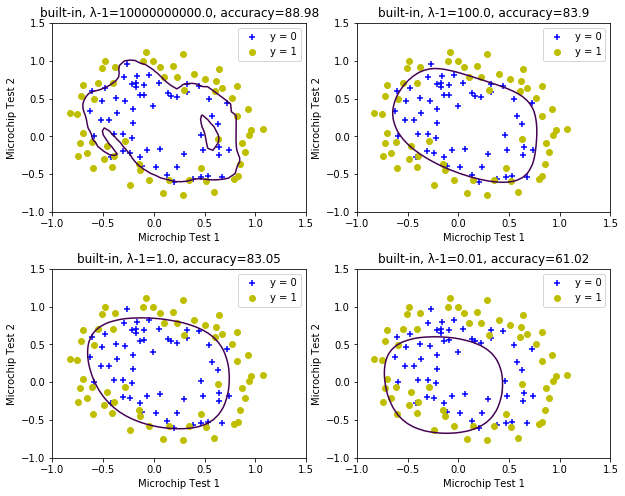

In [86]:
print("Cはλの逆数なので、Cを大きくした場合は正則化の効果が弱く、小さくした場合は正則化の効果が強くなります。")
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

CC = np.array([1e10, 100, 1, 0.01])
for i, c in enumerate(CC):
    regr = LogisticRegression(C = c, solver="newton-cg")
    regr.fit(X, y)
    accur = np.around(regr.score(X, y) * 100, 2)
    #Cの値ごとに4分割プロット
    plt.subplot(2, 2, i+1)
    plot_decision_boundary(regr, X, y, f"built-in, λ-1={c}, accuracy={accur}")

plt.show()

Cはλの逆数なので、Cを大きくした場合は正則化の効果が弱く、小さくした場合は正則化の効果が強くなります。

<h1>事例</h1>

In [89]:
import scipy.io as scio

# scipy.io.loadmat()を使ってmatlabデータを読み込み
data = scio.loadmat('./03_Logistic Regression_data_03.mat')
X = data['X']  # X は 5000x400 行列
y = data['y'].ravel()  # y は 5000 x 1 行列、ravel()を使って5000次元ベクトルに変換

model = sklearn.linear_model.LogisticRegression(penalty='l2', C=10.0) # モデルの定義
model.fit(X,y)    # 訓練データで学習
model.score(X,y)  # 訓練データでの正答率

0.965